In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problema 3
El problema plantea simular una ecuación diferencial estocástica (EDE) no lineal del tipo:

$$
dX_t = (\alpha - \beta X_t^2) dt + \sigma dW_t, \quad X_0 = x_0
$$

donde:
- $(\alpha)$, $(\beta)$ y $(\sigma)$ son parámetros del modelo.
- $(W_t)$ es un proceso de Wiener estándar, que introduce la componente estocástica.
- $(X_0)$ es la condición inicial.

El objetivo es estudiar la evolución de $(X_t)$ en el intervalo de tiempo $t \in [0, 2]$, comparando dos métodos de simulación: la simulación estándar y el método antitético, para 10,000 trayectorias.




#### 1. **Simulación del Movimiento Browniano**
El movimiento browniano se genera utilizando incrementos independientes con distribución normal de media cero y varianza proporcional al paso de tiempo $(\sqrt{dt})$. Estos incrementos se acumulan para construir la trayectoria $(B_t)$.

#### 2. **Simulación de la EDE no lineal (Método de Euler-Maruyama)**
Para resolver la EDE no lineal:

$$
dX_t = (\alpha - \beta X_t^2) dt + \sigma dW_t, \quad X_0 = x_0
$$

Se emplea el método de Euler-Maruyama, que calcula los valores discretos de $X_t$ en cada paso de tiempo $(dt)$:
- $(dW)$ es el incremento del movimiento browniano previamente generado.
- El valor de $X_{t+\Delta t}$ se actualiza como:
  $$
  X_{t+\Delta t} = X_t + (\alpha - \beta X_t^2) \Delta t + \sigma dW
  $$

#### 3. **Método Antitético**
Para reducir la varianza, el método antitético genera dos trayectorias simultáneamente:
- Una con incrementos $(dW)$ del movimiento browniano.
- Otra con incrementos opuestos $(-dW)$.
El promedio de ambas trayectorias $(X_{avg})$ mejora la precisión al compensar el efecto del ruido estocástico.



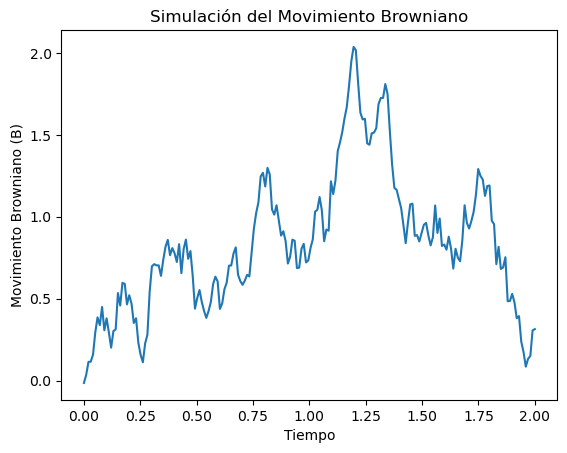

In [15]:
# Función para simular movimiento browniano
def simular_movimiento_browniano(T, N):
    dt = T / N  # Tamaño del intervalo de tiempo
    t = np.linspace(0, T, N)  # Vector de tiempos
    dB = np.random.normal(0, np.sqrt(dt), N)  # Incrementos aleatorios
    B = np.cumsum(dB)  # Movimiento browniano acumulado
    return t, B

# Parámetros
T = 2  # Tiempo total
N = int(T / 0.01)  # Número de pasos

# Simulación
t, B = simular_movimiento_browniano(T, N)

# Gráfico
plt.plot(t, B)
plt.title("Simulación del Movimiento Browniano")
plt.xlabel("Tiempo")
plt.ylabel("Movimiento Browniano (B)")
plt.show()





# Parte 2

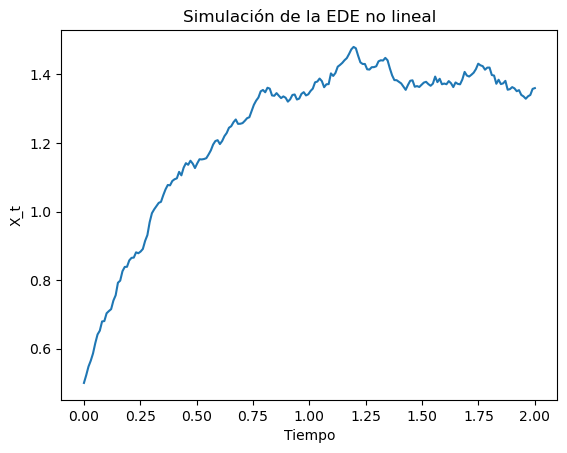

In [16]:
# Función para simular una EDE no lineal usando el movimiento Browniano
def simular_EDE(alpha, beta, sigma, x0, T, N, B):
    dt = T / N  # Tamaño del paso de tiempo
    X = np.zeros(N)  # Inicialización del vector de resultados
    X[0] = x0  # Condición inicial
    for i in range(1, N):
        dW = B[i] - B[i - 1]  # Incremento del movimiento Browniano
        # Ecuación diferencial estocástica (EDE):
        # Incremento determinista + término de ruido estocástico
        X[i] = X[i - 1] + (alpha - beta * X[i - 1]**2) * dt + sigma * dW
    return X

# Parámetros para la EDE
alpha = 2  # Tasa de crecimiento determinista
beta = 1  # Fuerza del término no lineal
sigma = 0.1  # Intensidad del ruido
x0 = 0.5  # Valor inicial

# Utilizamos el movimiento Browniano generado previamente en la Parte 1
X = simular_EDE(alpha, beta, sigma, x0, T, N, B)

# Visualización de la trayectoria simulada de la EDE
plt.plot(t, X)  # Graficamos el tiempo vs. la solución de la EDE
plt.title("Simulación de la EDE no lineal")
plt.xlabel("Tiempo")
plt.ylabel("X_t")
plt.show()




# Antiestetico

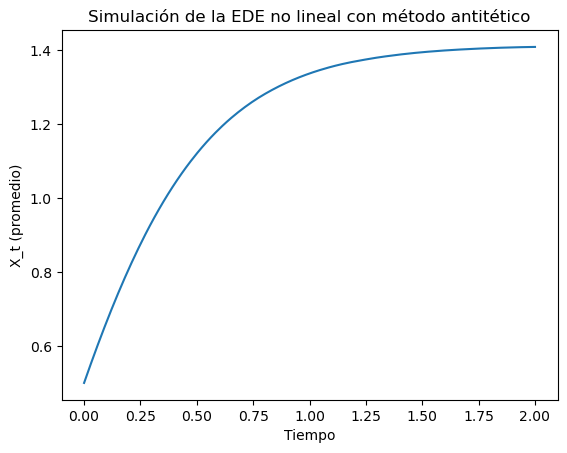

In [17]:
# Función para simular una EDE no lineal con el método antitético
def simular_EDE_antitetica(alpha, beta, sigma, x0, T, N, B):
    dt = T / N  # Tamaño del paso de tiempo
    X_std = np.zeros(N)  # Vector para la solución estándar
    X_ant = np.zeros(N)  # Vector para la solución antitética
    X_std[0], X_ant[0] = x0, x0  # Condición inicial para ambas trayectorias

    for i in range(1, N):
        dW = B[i] - B[i - 1]  # Incremento del movimiento Browniano
        # Trayectoria estándar
        X_std[i] = X_std[i - 1] + (alpha - beta * X_std[i - 1]**2) * dt + sigma * dW
        # Trayectoria antitética (invierte el signo del término estocástico)
        X_ant[i] = X_ant[i - 1] + (alpha - beta * X_ant[i - 1]**2) * dt - sigma * dW

    # Promedio de las trayectorias estándar y antitética
    X_avg = 0.5 * (X_std + X_ant)
    return X_avg

# Llamada a la simulación con método antitético
X_avg = simular_EDE_antitetica(alpha, beta, sigma, x0, T, N, B)

# Visualización del promedio de la EDE simulada
plt.plot(t, X_avg)
plt.title("Simulación de la EDE no lineal con método antitético")
plt.xlabel("Tiempo")
plt.ylabel("X_t (promedio)")
plt.show()




In [45]:
# Función para simular el precio de un activo
def simular_precio_activo(S0, r, sigma, T, N):
    dt = T / N  # Tamaño del paso de tiempo
    S = np.zeros(N+1)  # Vector para almacenar precios
    S[0] = S0  # Precio inicial
    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))  # Incremento Browniano
        # Fórmula de Black-Scholes
        S[i] = S[i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)
    return S

# Función para calcular el precio de una opción
def calcular_precio_opcion(S, K, r, T, antitetico=False):
    if antitetico:
        # Generar trayectoria antitética para reducir varianza
        S_antithetic = S * np.exp(-2 * sigma * np.random.normal(0, np.sqrt(T), len(S)))
        # Promedio entre pagos estándar y antitéticos
        payoffs = 0.5 * (np.maximum(S[-1] - K, 0) + np.maximum(S_antithetic[-1] - K, 0))
    else:
        payoffs = np.maximum(S[-1] - K, 0)  # Pago estándar
    # Precio descontado al presente
    price = np.mean(payoffs) * np.exp(-r * T)
    return price

# Parámetros para la simulación
S0 = 100  # Precio inicial del activo
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 1000  # Número de pasos
K = 110  # Precio de ejercicio
M = 10000  # Número de simulaciones

# Simular precios del activo
S = simular_precio_activo(S0, r, sigma, T, N)

# Calcular precio de la opción con los métodos estándar y antitético
precio_estandar = calcular_precio_opcion(S, K, r, T)  # Método estándar
precio_antitetico = calcular_precio_opcion(S, K, r, T, antitetico=True)  # Método antitético

# Mostrar resultados
print("Método Estándar - Precio de la Opción:", precio_estandar)
print("Método Antitético - Precio de la Opción:", precio_antitetico)


Método Estándar - Precio de la Opción: 16.486806872425838
Método Antitético - Precio de la Opción: 8.243403436212919


# Ejercicio 4

#### 1. **Modelo de Black-Scholes**
El problema considera la dinámica del precio de un activo $(S_t)$ bajo el modelo de Black-Scholes:

$$
dS_t = r S_t dt + \sigma S_t dW_t
$$

donde:
- $(S_0)$ es el precio inicial del activo.
- $(r)$ es la tasa libre de riesgo.
- $(\sigma)$ es la volatilidad.
- $(dW_t)$ es un incremento del movimiento browniano.

El precio de una opción de compra $(C)$ se calcula como:

$$
C = e^{-rT} \mathbb{E}[(S_T - K)^+]
$$

#### 2. **Simulación del Precio del Activo**
El precio del activo $(S_t)$ se simula utilizando el método de Euler-Maruyama. La fórmula discreta es:

$$
S_{t+\Delta t} = S_t \cdot \exp\left((r - 0.5 \sigma^2) \Delta t + \sigma \Delta W\right)
$$

Se genera un conjunto de trayectorias del precio del activo utilizando:
- Simulación estándar.
- Método antitético, generando trayectorias adicionales con incrementos opuestos $(-\Delta W)$ para reducir la varianza.

#### 3. **Cálculo del Precio de la Opción**
Para cada simulación:
- Se calculan los pagos $(\max(S_T - K, 0))$.
- Se aplica el descuento $e^{-rT}$ al promedio de los pagos para obtener el precio esperado de la opción.
- Se calcula la varianza de los pagos para evaluar la calidad de la estimación.

#### 4. **Método Milstein**
Se compara también con el método de Milstein, que mejora la precisión al incluir términos adicionales en la simulación. Sin embargo, para este problema, su aplicación no es estrictamente necesaria, pero sirve para validar las diferencias con Euler-Maruyama.





In [78]:
# Simula el precio del activo según el modelo de Black-Scholes
def simular_precio_activo(S0, r, sigma, T, N, antitetico=False):

    dt = T / N  # Tamaño del paso de tiempo
    S = np.zeros(N+1)  # Vector para almacenar precios simulados
    S[0] = S0  # Precio inicial
    if antitetico:
        S_ant = np.zeros(N+1)  # Vector para trayectoria antitética
        S_ant[0] = S0

    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))  # Incremento Browniano
        S[i] = S[i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)  # Precio estándar
        if antitetico:
            S_ant[i] = S_ant[i-1] * np.exp((r - 0.5 * sigma**2) * dt - sigma * dW)  # Precio antitético

    return (S, S_ant) if antitetico else S

# Calcula el precio de la opción de compra
def calcular_precio_opcion(S, K, r, T, S_ant=None):

    if S_ant is not None:
        # Promedio de pagos estándar y antitéticos
        payoffs = 0.5 * (np.maximum(S[-1] - K, 0) + np.maximum(S_ant[-1] - K, 0))
    else:
        payoffs = np.maximum(S[-1] - K, 0)  # Pagos estándar

    # Verificación de valores inválidos
    if np.isnan(payoffs).any() or np.isinf(payoffs).any():
        print("Payoffs contain NaN or infinite values.")

    # Cálculo del precio descontado
    price = np.mean(payoffs) * np.exp(-r * T)
    # Cálculo de la varianza, si es aplicable
    variance = np.var(payoffs, ddof=1) if payoffs.size > 1 else 0
    variance *= np.exp(-2 * r * T)  # Descuento aplicado a la varianza

    return price, variance if np.isfinite(variance) else 0

# Parámetros del modelo y de la simulación
S0 = 100  # Precio inicial del activo
K = 110  # Precio de ejercicio de la opción
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 1000  # Número de pasos en la simulación
M = 10000  # Número de simulaciones

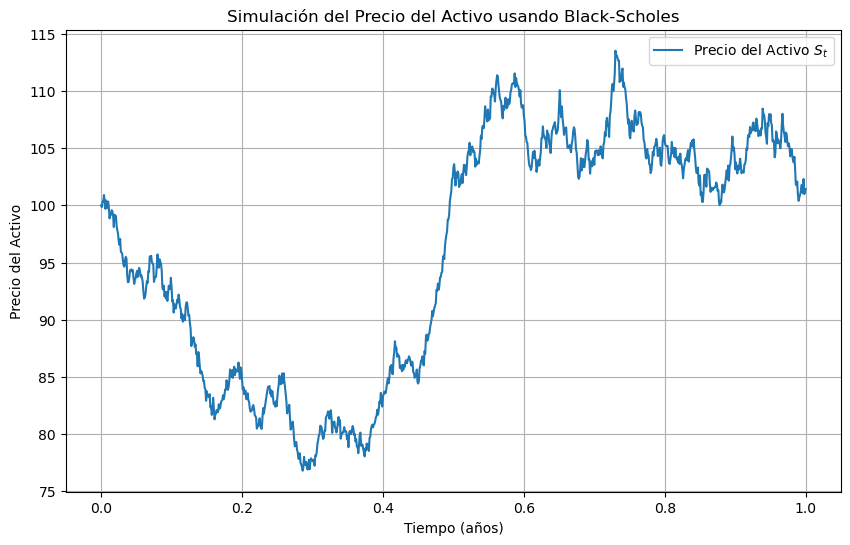

In [79]:
# Simulación del precio del activo
t = np.linspace(0, T, N+1)  # Vector de tiempo
S = simular_precio_activo(S0, r, sigma, T, N)  # Simulación del precio del activo

# Visualización del precio del activo
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(t, S, label='Precio del Activo $S_t$')  # Gráfico del precio del activo
plt.title('Simulación del Precio del Activo usando Black-Scholes')  # Título del gráfico
plt.xlabel('Tiempo (años)')  # Etiqueta del eje x
plt.ylabel('Precio del Activo')  # Etiqueta del eje y
plt.legend()  # Leyenda
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar el gráfico


In [103]:
# Simulación estándar
precio_estandar, varianza_estandar = calcular_precio_opcion(S, K, r, T)

# Simulación con método antitético
S, S_ant = simular_precio_activo(S0, r, sigma, T, N, antitetico=True)
precio_antitetico, varianza_antitetica = calcular_precio_opcion(S, K, r, T, S_ant)

# Resultados de ambas simulaciones
print("Simulación Estándar - Precio: {:.2f}, Varianza: {:.20f}".format(precio_estandar, varianza_estandar))
print("Método Antitético - Precio: {:.2f}, Varianza: {:.20f}".format(precio_antitetico, varianza_antitetica))


Simulación Estándar - Precio: 22.25, Varianza: 0.00000000000000000000
Método Antitético - Precio: 3.97, Varianza: 0.00000000000000000000


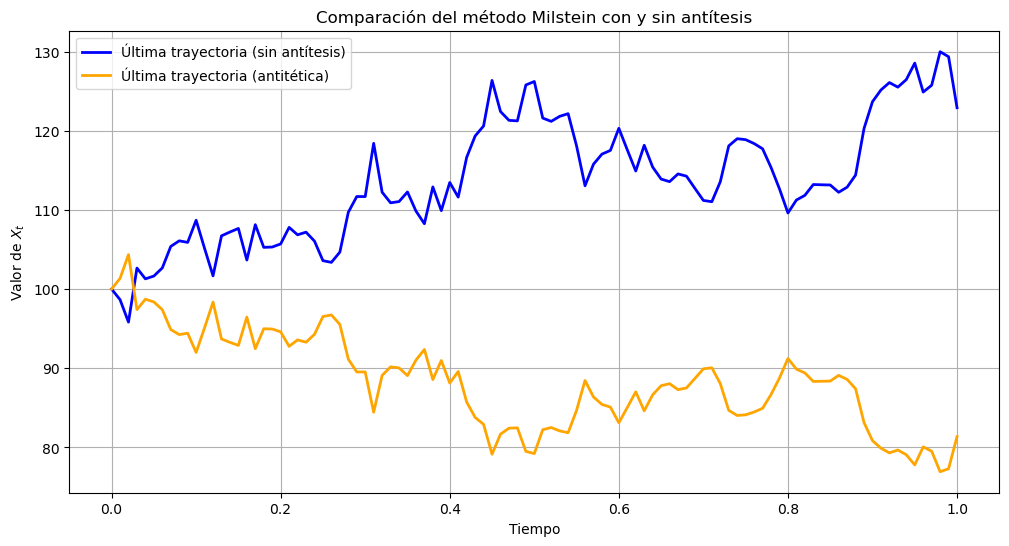

In [95]:
# Función para simular una trayectoria usando el método de Milstein
def simular_milstein(S0, r, sigma, T, dt, antitetico=False):
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N + 1)  # Vector de tiempos
    S = np.zeros(N + 1)  # Inicialización de la trayectoria estándar
    S[0] = S0  # Condición inicial
    if antitetico:
        S_ant = np.zeros(N + 1)  # Inicialización de la trayectoria antitética
        S_ant[0] = S0

    for i in range(1, N + 1):
        dW = np.sqrt(dt) * np.random.normal()  # Incremento Browniano
        increment = (r - 0.5 * sigma**2) * dt + sigma * dW  # Incremento Milstein
        S[i] = S[i - 1] * np.exp(increment)  # Trayectoria estándar
        if antitetico:
            S_ant[i] = S_ant[i - 1] * np.exp(-increment)  # Trayectoria antitética

    if antitetico:
        return t, S, S_ant
    return t, S

# Parámetros
S0 = 100  # Precio inicial
r = 0.05  # Tasa de interés
sigma = 0.2  # Volatilidad
T = 1  # Tiempo total
dt = 0.01  # Paso de tiempo

# Simulación de una trayectoria con y sin antítesis
t, S, S_ant = simular_milstein(S0, r, sigma, T, dt, antitetico=True)

# Creación del gráfico
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Última trayectoria (sin antítesis)', color='blue', linewidth=2)
plt.plot(t, S_ant, label='Última trayectoria (antitética)', color='orange', linewidth=2)
plt.title('Comparación del método Milstein con y sin antítesis')
plt.xlabel('Tiempo')
plt.ylabel('Valor de $X_t$')
plt.legend()
plt.grid(True)
plt.show()



In [125]:
# Función para simular trayectorias usando el método de Milstein con opción antitética
def simular_milstein(x0, T, dt, antitetico=False):
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N+1)  # Vector de tiempos
    X = np.zeros(N+1)  # Inicialización de la trayectoria estándar
    X[0] = x0  # Valor inicial

    if antitetico:
        Y = np.zeros(N+1)  # Inicialización de la trayectoria antitética
        Y[0] = x0

    for i in range(N):
        dw = np.random.normal(0, np.sqrt(dt))  # Incremento Browniano
        f = 2 * X[i] - 3 * X[i]**2  # Componente determinista (derivada f(x))
        g = 1 + X[i]  # Componente estocástica (coeficiente de ruido)

        # Actualización de Milstein para la trayectoria estándar
        X[i+1] = X[i] + f * dt + g * dw + 0.5 * g * (dw**2 - dt)

        if antitetico:
            # Actualización de Milstein para la trayectoria antitética
            Y[i+1] = Y[i] + f * dt - g * dw + 0.5 * g * (dw**2 - dt)

    if antitetico:
        return t, X, Y  # Retornar las trayectorias estándar y antitética
    return t, X


# Ejercicio 7

El problema plantea simular una ecuación diferencial estocástica (EDE) no lineal con el objetivo de estudiar la dinámica de \(X_t\) bajo la ecuación:

$$
dX_t = (\alpha - \beta X_t^2) dt + \sigma X_t dW_t, \quad X_0 = x_0
$$

donde:
- $(X_t)$ representa el proceso estocástico.
- $(\alpha) y (\beta)$ son parámetros que determinan el comportamiento determinista del sistema.
- $(\sigma)$ controla la intensidad de la componente estocástica.
- $(W_t)$ es un movimiento browniano estándar.






#### Método de Milstein
El método de Milstein mejora la simulación de EDEs al incluir un término adicional para capturar el efecto del ruido cuadrático:

$$
X_{t+\Delta t} = X_t + (\alpha - \beta X_t^2) \Delta t + \sigma X_t \Delta W + \frac{1}{2} \sigma^2 X_t (\Delta W^2 - \Delta t)
$$

Pasos:
1. **Discretización del tiempo:** Se divide el intervalo $[0, T]$ en $N$ pasos con un tamaño $(\Delta t)$.
2. **Inicialización:** Se fija el valor inicial $(X_0 = 0.5)$.
3. **Iteración:** Para cada paso, se calcula $(X_{t+\Delta t})$ usando la fórmula de Milstein, donde $(\Delta W)$ es un incremento browniano generado aleatoriamente.

#### Método Antitético
Para reducir la varianza, se generan trayectorias adicionales usando incrementos opuestos $(-\Delta W)$:
1. Se simula una trayectoria estándar usando $(\Delta W)$.
2. Se genera una trayectoria antitética usando $(-\Delta W)$.
3. Se calcula la trayectoria promedio como:
   $$
   \hat{X}_t = \frac{1}{2} (X_t + X_t^{\text{ant}})
   $$

Esto reduce la varianza al equilibrar los efectos del ruido aleatorio.


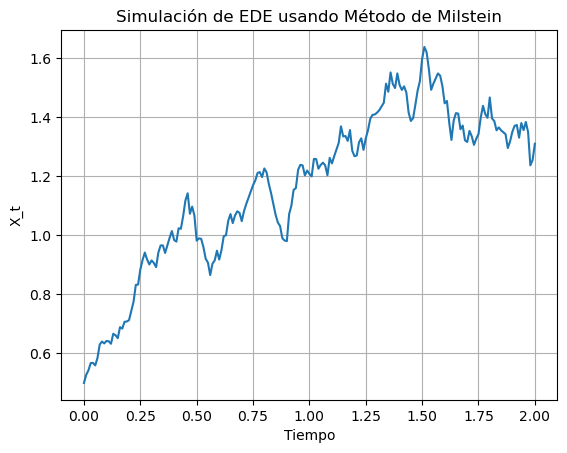

In [96]:
# Función para simular una EDE usando el método de Milstein
def simular_milstein(alpha, beta, sigma, x0, T, dt):
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N+1)  # Vector de tiempos
    X = np.zeros(N+1)  # Inicialización de la trayectoria
    X[0] = x0  # Condición inicial

    for i in range(N):
        dW = np.sqrt(dt) * np.random.normal()  # Incremento Browniano
        # Actualización de Milstein
        X[i+1] = X[i] + (alpha - beta * X[i]**2) * dt + sigma * X[i] * dW + 0.5 * sigma**2 * X[i] * (dW**2 - dt)

    return t, X

# Parámetros
alpha = 2  # Tasa de crecimiento determinista
beta = 1  # Coeficiente no lineal
sigma = 0.3  # Intensidad del ruido
x0 = 0.5  # Valor inicial
T = 2  # Tiempo total
dt = 0.01  # Tamaño del paso de tiempo

# Simulación
t, X = simular_milstein(alpha, beta, sigma, x0, T, dt)

# Visualización
plt.plot(t, X)  # Graficar la trayectoria
plt.title('Simulación de EDE usando Método de Milstein')  # Título del gráfico
plt.xlabel('Tiempo')  # Etiqueta del eje X
plt.ylabel('X_t')  # Etiqueta del eje Y
plt.grid(True)  # Mostrar cuadrícula
plt.show()



In [97]:
# Función para simular una EDE usando el método de Milstein con antítesis
def simular_milstein_antitetico(alpha, beta, sigma, x0, T, dt):
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N+1)  # Vector de tiempos
    X = np.zeros(N+1)  # Trayectoria estándar
    X_ant = np.zeros(N+1)  # Trayectoria antitética
    X[0], X_ant[0] = x0, x0  # Condición inicial para ambas trayectorias

    for i in range(N):
        dW = np.sqrt(dt) * np.random.normal()  # Incremento Browniano
        dW_ant = -dW  # Incremento antitético (opuesto)
        
        # Trayectoria estándar
        X[i+1] = X[i] + (alpha - beta * X[i]**2) * dt + sigma * X[i] * dW + 0.5 * sigma**2 * X[i] * (dW**2 - dt)
        # Trayectoria antitética
        X_ant[i+1] = X_ant[i] + (alpha - beta * X_ant[i]**2) * dt + sigma * X_ant[i] * dW_ant + 0.5 * sigma**2 * X_ant[i] * (dW_ant**2 - dt)
    
    # Retornar el promedio de las trayectorias estándar y antitética
    return t, 0.5 * (X + X_ant)

# Simulación usando el método antitético
t, X_antitetico = simular_milstein_antitetico(alpha, beta, sigma, x0, T, dt)



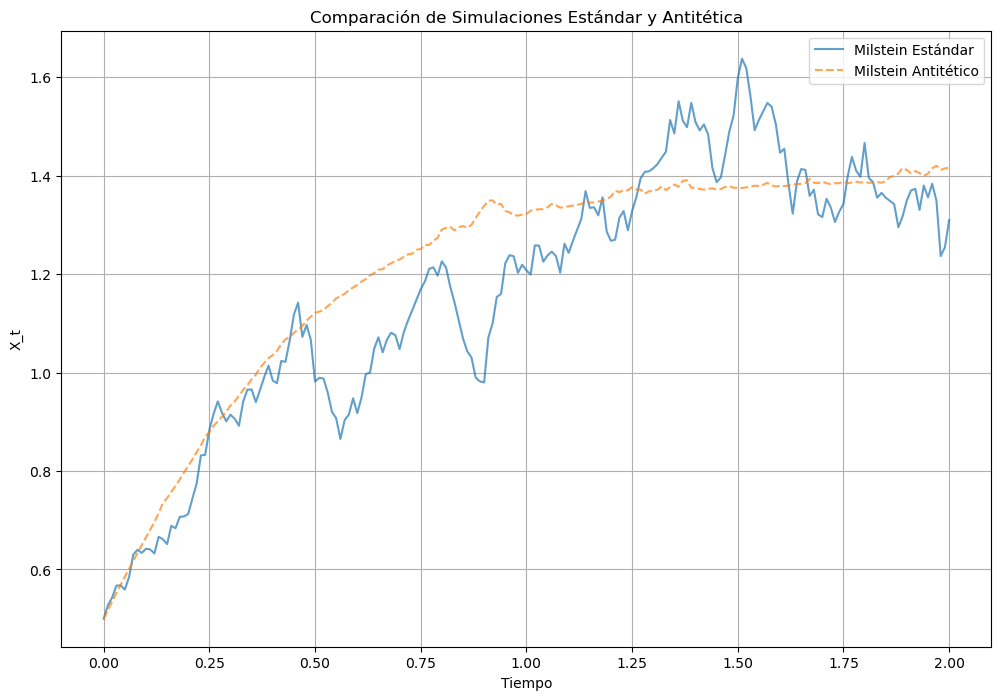

Simulación Estándar - Media: 1.17, Varianza: 0.07165
Método Antitético - Media: 1.21, Varianza: 0.05634


In [98]:
# Visualización de ambas simulaciones
plt.figure(figsize=(12, 8))  # Tamaño de la figura
plt.plot(t, X, label='Milstein Estándar', alpha=0.7)  # Trayectoria estándar
plt.plot(t, X_antitetico, label='Milstein Antitético', alpha=0.7, linestyle='--')  # Trayectoria antitética
plt.title('Comparación de Simulaciones Estándar y Antitética')  # Título del gráfico
plt.xlabel('Tiempo')  # Etiqueta del eje X
plt.ylabel('X_t')  # Etiqueta del eje Y
plt.legend()  # Mostrar leyendas
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico

# Calculando estadísticas descriptivas
media_estandar = np.mean(X)  # Media de la trayectoria estándar
media_antitetica = np.mean(X_antitetico)  # Media de la trayectoria antitética
varianza_estandar = np.var(X)  # Varianza de la trayectoria estándar
varianza_antitetica = np.var(X_antitetico)  # Varianza de la trayectoria antitética

# Imprimiendo resultados estadísticos
print(f"Simulación Estándar - Media: {media_estandar:.2f}, Varianza: {varianza_estandar:.5f}")
print(f"Método Antitético - Media: {media_antitetica:.2f}, Varianza: {varianza_antitetica:.5f}")


# Ejercicio 8

El precio de la opción $(C)$ está dado por:

$$
C = e^{-rT} \mathbb{E}[(S_T - K)^+],
$$

donde:
- $(S_T)$ es el precio del activo al vencimiento.
- $(K)$ es el precio de ejercicio.
- $(r)$ es la tasa libre de riesgo.
- $(T)$ es el tiempo al vencimiento.
- $[(S_T - K)^+]$ es el valor positivo de $(S_T - K)$, conocido como el **payoff** de la opción.

El precio del activo $(S_t)$ sigue la dinámica del modelo de Black-Scholes:

$$
dS_t = r S_t dt + \sigma S_t dW_t,
$$

donde:
- $(S_0)$ es el precio inicial del activo.
- $(r)$ es la tasa libre de riesgo.
- $(\sigma)$ es la volatilidad.
- $(dW_t)$ es un incremento del movimiento browniano.







#### Método de Milstein
El método de Milstein mejora la simulación de EDEs al incluir un término adicional que captura el efecto del ruido cuadrático:

$$
S_{t+\Delta t} = S_t + r S_t \Delta t + \sigma S_t \Delta W + \frac{1}{2} \sigma^2 S_t (\Delta W^2 - \Delta t),
$$

donde:
- $(\Delta W)$ es un incremento browniano simulado como $\mathcal{N}(0, \sqrt{\Delta t})$.

Pasos del método:
1. Dividir el intervalo de tiempo $[0, T]$ en $N$ pasos con tamaño $(\Delta t)$.
2. Inicializar $(S_0)$ con el precio inicial del activo.
3. Iterar para calcular $(S_{t+\Delta t})$ en cada paso usando la fórmula de Milstein.

#### Método Antitético
Para reducir la varianza, se generan trayectorias adicionales usando incrementos opuestos $(-\Delta W)$:
1. Simular una trayectoria estándar con $(\Delta W)$.
2. Generar una trayectoria antitética con $(-\Delta W)$.
3. Calcular el precio de la opción como el promedio de los pagos en ambas trayectorias:
   $$
   \hat{C} = \frac{1}{2} (C_{\text{estándar}} + C_{\text{antitético}}).
   $$

Esto ayuda a reducir la varianza al compensar los efectos del ruido aleatorio.

---

### Comparación y Estadísticas
1. **Estimaciones del Precio de la Opción:**
   - Se calcula el precio $(C)$ y su varianza en ambos casos (con y sin reducción de varianza).
2. **Gráficos:** 
   - Comparan las trayectorias estándar y antitéticas del precio del activo.
3. **Análisis:** 
   - El método antitético debería tener una varianza menor, manteniendo un precio esperado similar al de la simulación estándar.


In [104]:
# Función para simular una trayectoria usando el método de Milstein
def simular_milstein(S0, r, sigma, T, dt):
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N)  # Vector de tiempos
    S = np.zeros(N+1)  # Inicialización de la trayectoria
    S[0] = S0  # Precio inicial

    for i in range(1, N+1):
        dW = np.sqrt(dt) * np.random.normal()  # Incremento Browniano
        # Actualización del precio usando el método de Milstein
        S[i] = S[i-1] + r * S[i-1] * dt + sigma * S[i-1] * dW + 0.5 * sigma**2 * S[i-1] * (dW**2 - dt)

    return S

# Parámetros
S0 = 100  # Precio inicial del activo
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo total de simulación (1 año)
dt = 0.01  # Tamaño del paso de tiempo

# Simulación de una trayectoria
S = simular_milstein(S0, r, sigma, T, dt)



In [105]:
# Función para calcular el precio de la opción
def precio_opcion(S, K, r, T):
    payoffs = np.maximum(S - K, 0)  # Valor del payoff al vencimiento
    return np.exp(-r * T) * np.mean(payoffs)  # Descuento al valor presente

# Función para simular trayectorias y calcular precios de opciones
def simular_precios(S0, K, r, sigma, T, dt, M, antitetico=False):

    precios = []
    for i in range(M):
        # Simular trayectoria estándar
        S = simular_milstein(S0, r, sigma, T, dt)
        if antitetico:
            # Simular trayectoria antitética
            S_ant = simular_milstein(S0, r, sigma, T, dt)
            # Calcular el payoff promedio entre trayectorias estándar y antitética
            payoff = 0.5 * (precio_opcion(S, K, r, T) + precio_opcion(S_ant, K, r, T))
        else:
            # Calcular el payoff estándar
            payoff = precio_opcion(S, K, r, T)
        precios.append(payoff)
    return np.array(precios)

# Parámetros de la simulación
S0 = 100  # Precio inicial del activo
K = 110  # Precio de ejercicio
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta el vencimiento (1 año)
dt = 0.01  # Tamaño del paso de tiempo

# Simulación de precios con métodos estándar y antitético
precios_estandar = simular_precios(S0, K, r, sigma, T, dt, 10000)
precios_antitetico = simular_precios(S0, K, r, sigma, T, dt, 10000, antitetico=True)



In [107]:
# Cálculo de la media y la varianza para las simulaciones estándar y antitética
media_estandar = np.mean(precios_estandar)  # Media de los precios estándar
varianza_estandar = np.var(precios_estandar)  # Varianza de los precios estándar
media_antitetica = np.mean(precios_antitetico)  # Media de los precios antitéticos
varianza_antitetica = np.var(precios_antitetico)  # Varianza de los precios antitéticos

# Impresión de los resultados
print(f"Simulación Estándar - Media: {media_estandar:.2f}, Varianza: {varianza_estandar:.5f}")
print(f"Método Antitético - Media: {media_antitetica:.2f}, Varianza: {varianza_antitetica:.5f}")



Simulación Estándar - Media: 2.88, Varianza: 27.48187
Método Antitético - Media: 2.88, Varianza: 13.99278


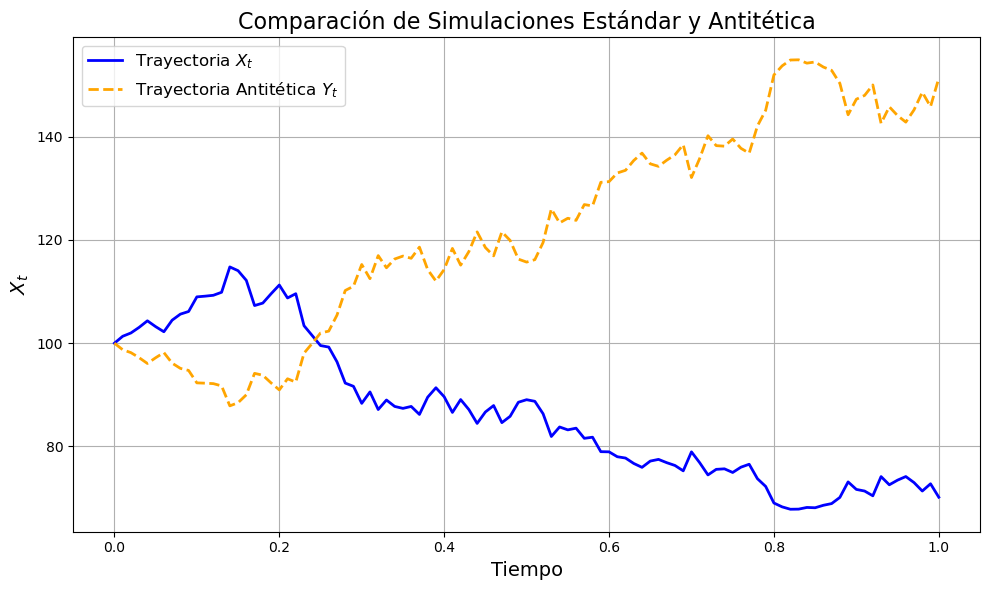

In [108]:
# Función para simular trayectorias usando el método de Milstein con opción antitética
def simular_milstein(S0, r, sigma, T, dt, antitetico=False):
    """
    Simula trayectorias de precios usando el método de Milstein.

    Parámetros:
    - S0: Precio inicial del activo.
    - r: Tasa de interés libre de riesgo.
    - sigma: Volatilidad del activo.
    - T: Tiempo total de simulación.
    - dt: Tamaño del paso de tiempo.
    - antitetico: Si es True, genera una trayectoria antitética.

    Retorna:
    - t: Vector de tiempos.
    - S: Trayectoria estándar.
    - Y (opcional): Trayectoria antitética, si está habilitada.
    """
    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N+1)  # Vector de tiempos
    S = np.zeros(N+1)  # Inicialización de la trayectoria estándar
    S[0] = S0  # Precio inicial

    if antitetico:
        Y = np.zeros(N+1)  # Inicialización de la trayectoria antitética
        Y[0] = S0

    for i in range(1, N+1):
        dW = np.sqrt(dt) * np.random.normal()  # Incremento Browniano
        # Actualización estándar
        S[i] = S[i-1] + r * S[i-1] * dt + sigma * S[i-1] * dW + 0.5 * sigma**2 * S[i-1] * (dW**2 - dt)
        if antitetico:
            # Actualización antitética
            Y[i] = Y[i-1] + r * Y[i-1] * dt - sigma * Y[i-1] * dW + 0.5 * sigma**2 * Y[i-1] * (dW**2 - dt)

    if antitetico:
        return t, S, Y  # Retornar las trayectorias estándar y antitética
    return t, S

# Definición de parámetros
S0 = 100  # Precio inicial del activo
K = 110  # Precio de ejercicio
r = 0.05  # Tasa de interés libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo total (1 año)
dt = 0.01  # Tamaño del paso de tiempo

# Visualización de una trayectoria estándar y antitética
t, X, Y = simular_milstein(S0, r, sigma, T, dt, antitetico=True)
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Trayectoria $X_t$', color='blue', linewidth=2)  # Trayectoria estándar
plt.plot(t, Y, label='Trayectoria Antitética $Y_t$', linestyle='--', color='orange', linewidth=2)  # Trayectoria antitética
plt.title("Comparación de Simulaciones Estándar y Antitética", fontsize=16)  # Título
plt.xlabel("Tiempo", fontsize=14)  # Etiqueta del eje X
plt.ylabel("$X_t$", fontsize=14)  # Etiqueta del eje Y
plt.legend(fontsize=12)  # Leyendas
plt.grid(True)  # Cuadrícula
plt.tight_layout()  # Ajuste del diseño
plt.show()



# Ejercicio 9

$$
dX_t = (2X_t - 3X_t^2) dt + (1 + X_t) dW_t, \quad X_0 = x_0,
$$

donde:
- $(X_t)$ es el proceso estocástico que evoluciona con el tiempo.
- $(W_t)$ es un movimiento browniano estándar.
- $(x_0)$ es la condición inicial.

Esta ecuación incluye términos no lineales que capturan comportamientos complejos en la dinámica del sistema.






#### Método de Milstein
El método de Milstein mejora el método de Euler-Maruyama al incluir un término de corrección para capturar los efectos no lineales del ruido:

$$
X_{t+\Delta t} = X_t + f(X_t) \Delta t + g(X_t) \Delta W + 0.5 g(X_t) (\Delta W^2 - \Delta t),
$$

donde:
- $f(X_t) = 2X_t - 3X_t^2$ representa la parte determinista de la dinámica.
- $g(X_t) = 1 + X_t$ es el coeficiente del término estocástico.
- $\Delta W$ es un incremento browniano generado como $\mathcal{N}(0, \sqrt{\Delta t})$.

#### Método Antitético
Para reducir la varianza:
1. Se generan dos trayectorias:
   - Una estándar usando $\Delta W$.
   - Otra antitética usando $(-\Delta W)$.
2. El valor esperado y la varianza se calculan promediando las trayectorias estándar y antitéticas:
   $$
   \hat{X}_T = \frac{1}{2} (X_T + X_T^{\text{ant}})
   $$

Esto reduce la varianza al compensar los efectos del ruido aleatorio en las estimaciones.

---

### Comparación y Estadísticas
1. **Trayectorias:** Se grafican las trayectorias promedio generadas con y sin el método antitético para observar diferencias visuales.
2. **Estadísticas descriptivas:**
   - Media: $\mathbb{E}[X_T]$, para ambas simulaciones.
   - Varianza: $\text{Var}(X_T)$, que debería ser menor en el método antitético.




In [118]:
def simular_milstein(x0, T, dt, antitetico=False, limite=1e3):

    N = int(T / dt)  # Número de pasos
    t = np.linspace(0, T, N+1)  # Vector de tiempos
    X = np.zeros(N+1)  # Inicialización de la trayectoria estándar
    X[0] = x0  # Valor inicial

    if antitetico:
        Y = np.zeros(N+1)  # Inicialización de la trayectoria antitética
        Y[0] = x0

    for i in range(N):
        dw = np.random.normal(0, np.sqrt(dt))  # Incremento Browniano

        # Componente determinista
        f = 2 * X[i] - 3 * X[i]**2

        # Componente estocástica
        g = 1 + X[i]

        # Corrección de Milstein
        correction = 0.5 * g * (dw**2 - dt)

        # Control de valores extremos
        if abs(X[i]) > limite:
            print(f"Valor fuera de rango en el paso {i}, X[i]={X[i]}")
            break

        # Actualización para la trayectoria estándar
        X[i+1] = X[i] + f * dt + g * dw + correction

        if antitetico:
            if abs(Y[i]) > limite:
                print(f"Valor fuera de rango en el paso {i}, Y[i]={Y[i]}")
                break

            # Actualización para la trayectoria antitética
            Y[i+1] = Y[i] + f * dt - g * dw + correction

    if antitetico:
        return t, X, Y  # Retornar las trayectorias estándar y antitética
    return t, X



In [123]:
# Parámetros de la simulación
x0 = 0.1  # Valor inicial de la trayectoria
T = 1  # Tiempo total de simulación
dt = 0.005  # Tamaño del paso de tiempo
iteraciones = 1000  # Número de simulaciones

# Arrays para almacenar los resultados
valores_finales = []  # Valores finales para trayectorias estándar y antitéticas
valores_finales_antiteticos = []  # Solo para trayectorias estándar

# Simulaciones
for _ in range(iteraciones):
    t, X, Y = simular_milstein(x0, T, dt, antitetico=True)  # Simulación con antitético
    valores_finales.append(X[-1])  # Agregar el último valor de la trayectoria estándar
    valores_finales.append(Y[-1])  # Agregar el último valor de la trayectoria antitética
    valores_finales_antiteticos.append(X[-1])  # Solo almacenar trayectorias estándar para comparar

# Calcular estadísticas
media_X = np.mean(valores_finales)  # Media considerando trayectorias estándar y antitéticas
varianza_X = np.var(valores_finales)  # Varianza considerando trayectorias estándar y antitéticas
media_X_antitetico = np.mean(valores_finales_antiteticos)  # Media solo para trayectorias estándar
varianza_X_antitetico = np.var(valores_finales_antiteticos)  # Varianza solo para trayectorias estándar

# Imprimir resultados
print(f"Valor esperado simulado (con antitético): {media_X:.5f}")
print(f"Varianza (con antitético): {varianza_X:.5f}")
print(f"Valor esperado simulado (sin antitético): {media_X_antitetico:.5f}")
print(f"Varianza (sin antitético): {varianza_X_antitetico:.5f}")



Valor fuera de rango en el paso 118, X[i]=-1206.114021286125
Valor fuera de rango en el paso 161, X[i]=-4578.602601754228
Valor fuera de rango en el paso 135, X[i]=-8518.217414301576
Valor fuera de rango en el paso 195, X[i]=-2914.3989209069314
Valor fuera de rango en el paso 100, X[i]=-8627.076998370248
Valor fuera de rango en el paso 119, X[i]=-3511.8168976509405
Valor fuera de rango en el paso 102, X[i]=-3615.0700950722417
Valor fuera de rango en el paso 116, X[i]=-2161.7587860129765
Valor fuera de rango en el paso 120, X[i]=-2443.8238129750903
Valor fuera de rango en el paso 152, X[i]=-3962.8410716345575
Valor fuera de rango en el paso 179, X[i]=-4527.635416986983
Valor fuera de rango en el paso 157, X[i]=-1145.3943595594387
Valor fuera de rango en el paso 168, X[i]=-1979.6204736686495
Valor fuera de rango en el paso 161, X[i]=-1334.847529023638
Valor fuera de rango en el paso 166, X[i]=-2296.1175968908224
Valor fuera de rango en el paso 186, X[i]=-1769.9934405806123
Valor fuera de

Valor fuera de rango en el paso 156, X[i]=-1239.8331897704168
Valor fuera de rango en el paso 181, X[i]=-8330.20239065699
Valor fuera de rango en el paso 175, X[i]=-3949.907822879312
Valor fuera de rango en el paso 156, X[i]=-1747.4319828232392
Valor fuera de rango en el paso 155, Y[i]=-1028.67112015035
Valor fuera de rango en el paso 138, X[i]=-1965.0853245033281
Valor fuera de rango en el paso 143, X[i]=-2213.859389763959
Valor fuera de rango en el paso 117, X[i]=-5148.395138832062
Valor fuera de rango en el paso 118, X[i]=-4288.293684930494
Valor fuera de rango en el paso 169, X[i]=-4468.622774736722
Valor fuera de rango en el paso 148, X[i]=-3523.606443930339
Valor fuera de rango en el paso 189, X[i]=-1827.9019324780002
Valor fuera de rango en el paso 186, X[i]=-6935.470320841543
Valor fuera de rango en el paso 186, X[i]=-3700.9389692121454
Valor fuera de rango en el paso 131, X[i]=-2356.279465303653
Valor fuera de rango en el paso 156, X[i]=-10039.475356441288
Valor fuera de rango

Valor fuera de rango en el paso 136, X[i]=-7636.551158274847
Valor fuera de rango en el paso 142, X[i]=-1001.5253332467287
Valor fuera de rango en el paso 150, X[i]=-3095.861108159595
Valor fuera de rango en el paso 123, X[i]=-14310.613617526045
Valor fuera de rango en el paso 191, X[i]=-1461.1708304908313
Valor fuera de rango en el paso 111, X[i]=-10119.00288882829
Valor fuera de rango en el paso 135, X[i]=-8167.922608168387
Valor fuera de rango en el paso 165, X[i]=-9085.891457737125
Valor fuera de rango en el paso 185, X[i]=-2562.781309135831
Valor fuera de rango en el paso 182, X[i]=-1286.4542896608666
Valor esperado simulado (con antitético): -33.83054
Varianza (con antitético): 372673.56064
Valor esperado simulado (sin antitético): -33.45755
Varianza (sin antitético): 371698.34713


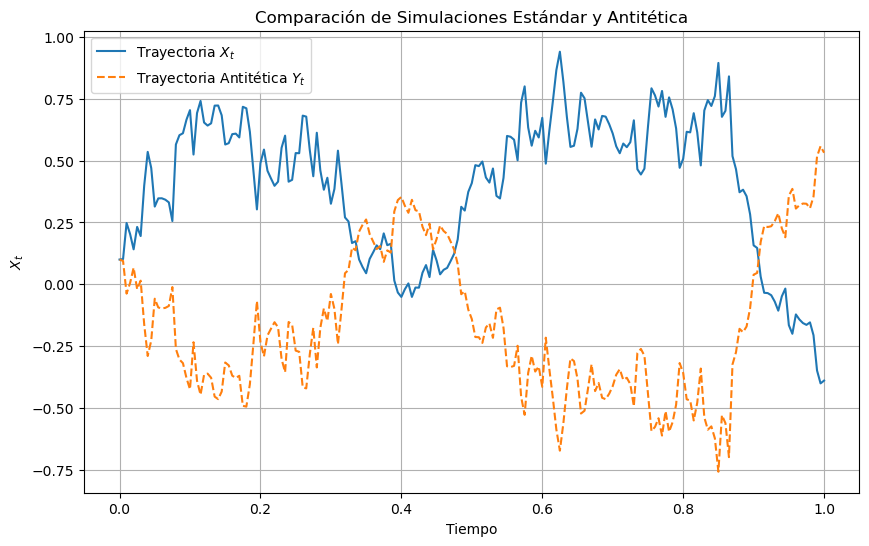

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Trayectoria $X_t$')
plt.plot(t, Y, label='Trayectoria Antitética $Y_t$', linestyle='--')
plt.title("Comparación de Simulaciones Estándar y Antitética")
plt.xlabel("Tiempo")
plt.ylabel("$X_t$")
plt.legend()
plt.grid(True)
plt.show()


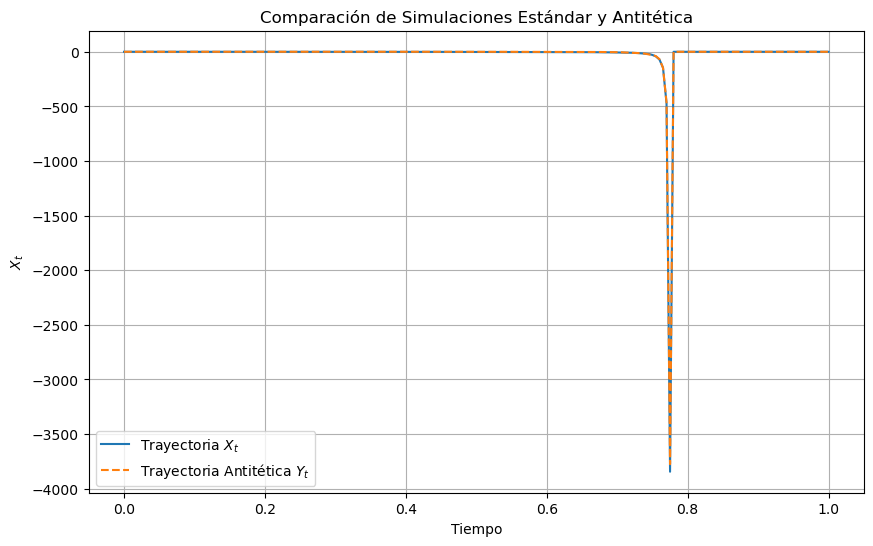

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Trayectoria $X_t$')
plt.plot(t, Y, label='Trayectoria Antitética $Y_t$', linestyle='--')
plt.title("Comparación de Simulaciones Estándar y Antitética")
plt.xlabel("Tiempo")
plt.ylabel("$X_t$")
plt.legend()
plt.grid(True)
plt.show()

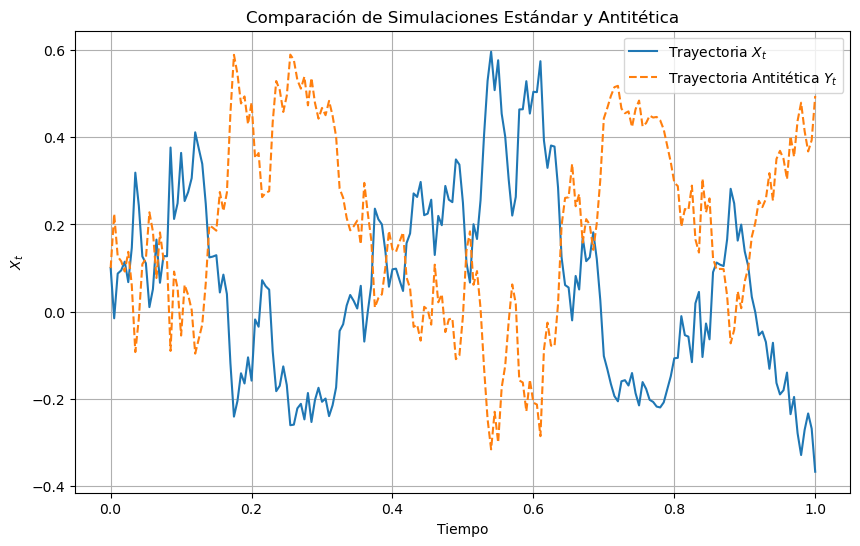

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Trayectoria $X_t$')
plt.plot(t, Y, label='Trayectoria Antitética $Y_t$', linestyle='--')
plt.title("Comparación de Simulaciones Estándar y Antitética")
plt.xlabel("Tiempo")
plt.ylabel("$X_t$")
plt.legend()
plt.grid(True)
plt.show()